# Version Check

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


# Load Libraries

In [12]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import csv
import os
import re

In [13]:
pre_datasets = pandas.read_csv('datasets_T.csv', low_memory=False)
headers = pre_datasets.iloc[0]
DATASETS  = pandas.DataFrame(pre_datasets.values[1:], columns=headers)
DATASETS = DATASETS.dropna(axis='columns', how='all')
CLASSIFICATION = DATASETS['STATUS']


In [24]:
encoder = LabelEncoder()
DATASETS['ID_REF'] = encoder.fit_transform(DATASETS['ID_REF'])
CLASSIFICATION = pandas.Series(encoder.fit_transform(CLASSIFICATION),
index=CLASSIFICATION.index, name=CLASSIFICATION.name)

x_train, x_test, y_train, y_test = train_test_split(
DATASETS.drop(labels='STATUS', axis=1), CLASSIFICATION, test_size=0.20) #APYQ

In [30]:
clf = RandomForestClassifier(n_estimators=7000,random_state=0,criterion='entropy',min_samples_split=20).fit(x_train, y_train.values.ravel())
print ("Accuracy of Random Forest Classifier: "+str(clf.score(x_test,y_test)))

# algorithm, learning_rate_init, alpha, hidden_layer_sizes, and activation have impact
clf2 = MLPClassifier(solver='adam', alpha=0.01, max_iter=1000,
	learning_rate='adaptive', hidden_layer_sizes=(400,), 
	random_state=0, learning_rate_init=1e-2,
	activation='logistic').fit(x_train, y_train.values.ravel())
print ("Accuracy of Multi-layer Perceptron Classifier: "+str(clf2.score(x_test,y_test)))

clf3 = GradientBoostingClassifier(n_estimators=1000, learning_rate=1,
	max_depth=10, random_state=0, min_samples_split=20).fit(x_train, y_train.values.ravel())
print ("Accuracy of Gradient Boosting Classifier: "+str(clf3.score(x_test,y_test)))

clf4 = SVC(kernel='rbf',C=1,gamma=0.001,random_state=0,probability=True).fit(x_train, y_train.values.ravel())
print ("Accuracy of SVM: "+str(clf4.score(x_test,y_test)))

clf5 = GaussianNB().fit(x_train, y_train.values.ravel())
print ("Accuracy of Gaussian Naive Bayes Classifier: "+str(clf5.score(x_test,y_test)))

Accuracy of Random Forest Classifier: 0.6666666666666666
Accuracy of Multi-layer Perceptron Classifier: 0.5
Accuracy of Gradient Boosting Classifier: 0.8333333333333334
Accuracy of SVM: 0.5
Accuracy of Gaussian Naive Bayes Classifier: 0.6666666666666666


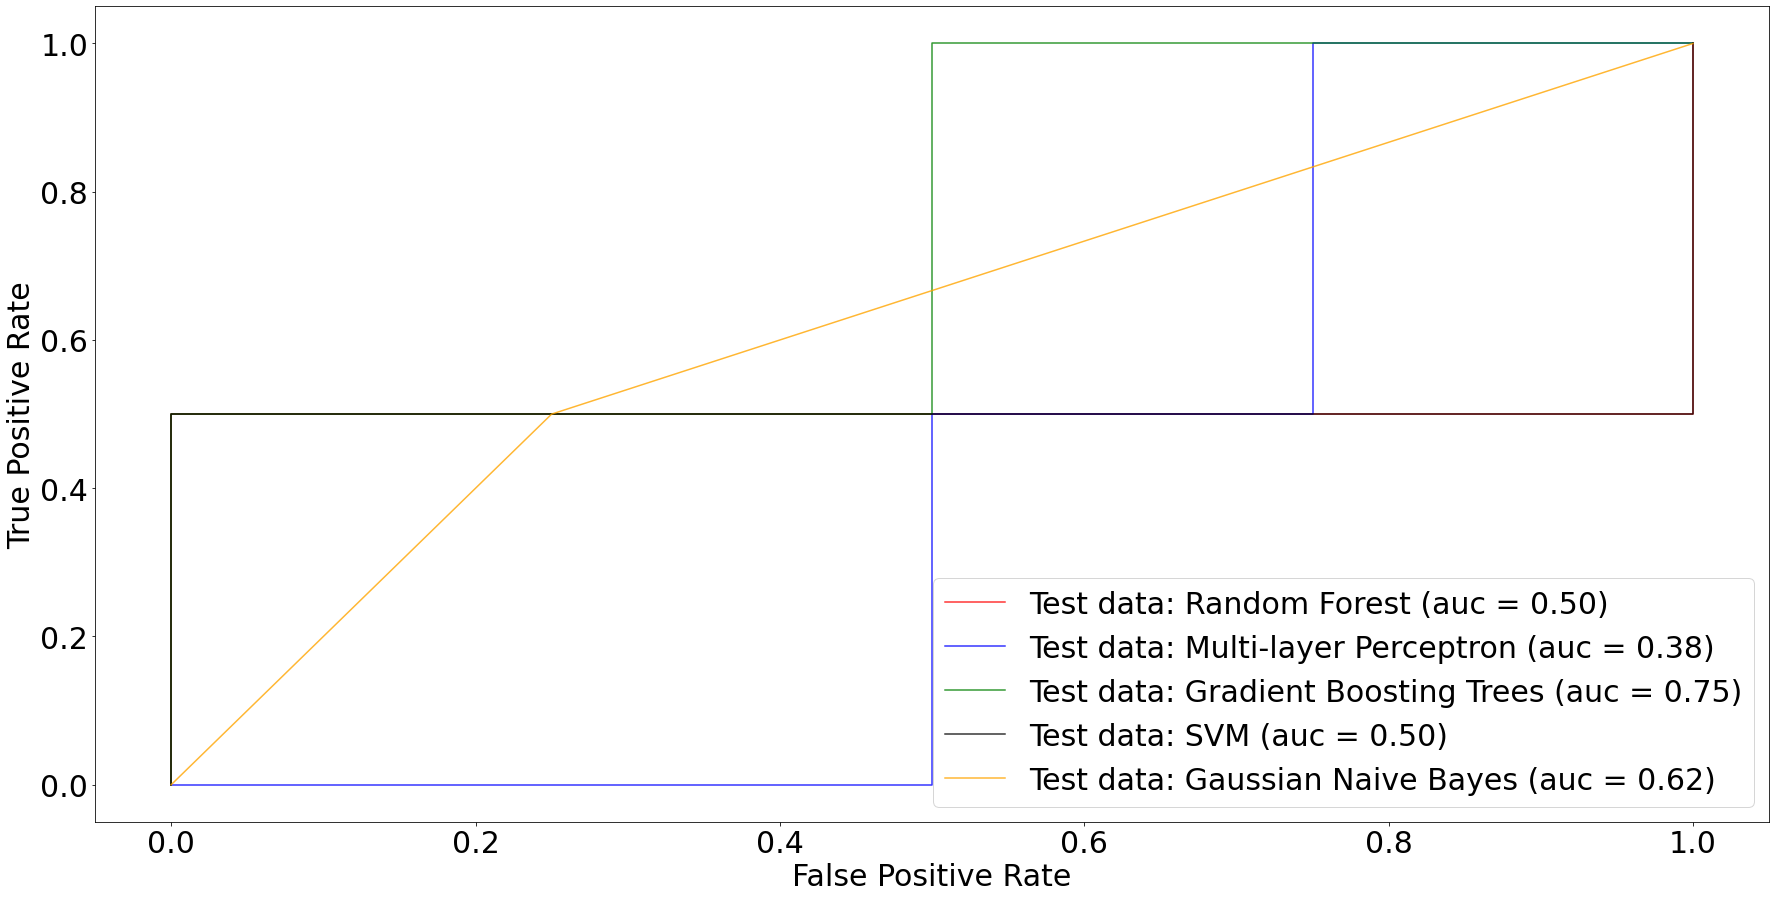

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline
# Only 2-class problem
cls = 0
# Set figure size and plot layout
figsize=(30,15)
f, ax = plt.subplots(1, 1, figsize=figsize)

params = [(clf,'red',"Random Forest"),(clf2,'blue',"Multi-layer Perceptron"),(clf3,'green',"Gradient Boosting Trees"),
         (clf4,'black',"SVM"),(clf5,'orange','Gaussian Naive Bayes')]

for x in params:
    y_true = y_test[y_test.argsort().index]
    y_prob = x[0].predict_proba(x_test.loc[y_test.argsort().index,:])
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, cls], pos_label=cls)
    roc_auc = roc_auc_score(y_true == cls, y_prob[:, cls])
    ax.plot(fpr, tpr, color=x[1], alpha=0.8,
    label='Test data: {} '
    '(auc = {:.2f})'.format(x[2] ,roc_auc))


ax.set_xlabel('False Positive Rate',fontsize=30)
ax.set_ylabel('True Positive Rate',fontsize=30)
ax.legend(loc="lower right",fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)

5 5


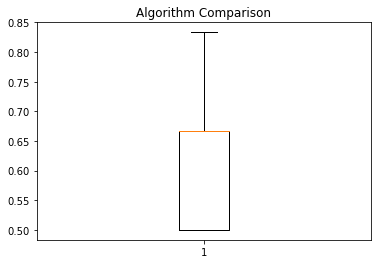

In [65]:
results= []
results.append(clf.score(x_test,y_test))
results.append(clf2.score(x_test,y_test))
results.append(clf3.score(x_test,y_test))
results.append(clf4.score(x_test,y_test))
results.append(clf5.score(x_test,y_test))

names = ['Random Forest', 'MLP', 'Gradient Boost', 'SVM', 'GNB']
print(len(results), len(names))
pyplot.boxplot(results, )
pyplot.title('Algorithm Comparison')
pyplot.show()

In [68]:
print(DATASETS.values)

[[0 '10.06793621' '7.045942189' ... '13.99027555' '13.8788837'
  'Healthy control']
 [1 '10.22177215' '7.249467163999999' ... '13.93939807' '13.80124732'
  'Healthy control']
 [2 '10.36145148' '6.807758118' ... '14.01422901' '13.81699492'
  'Healthy control']
 ...
 [32 '9.39989295' '7.313117198' ... '13.95270772' '13.77812527'
  'ulcerative colitis']
 [33 '10.18764976' '7.032269209' ... '14.01123002' '13.82817247'
  'ulcerative colitis']
 [34 '9.936803372' '6.973370373' ... '14.00196006' '13.81903383'
  'ulcerative colitis']]
